# **Parameter Estimation**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from numpy import exp
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy import stats
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col
import math

# **PART - A**

In the first part we use maximum likelihood to estimate parameters for the distributions of two classes of Data. In the first class are the values of indicator x, that show tha someone did not feel stress while playing a specific video game. In the second class there are values that shoe someone did not feel stress. After estmation of parameters a discriminant function is used to categorize data.

In [ ]:
class Classifier:

  def fit(self,D,thetaRange,classNumber):
    #calculate
    log_likelihood1 = lambda theta : sum(math.log((1/math.pi)*(1/(1 +(x-theta)**2))) for x in D)
    estimates = [log_likelihood1(theta) for theta in thetaRange]
    theta = thetaRange[estimates.index(max(estimates))]
    #plot
    plt.plot(thetaRange, estimates,label = f'$log(p(D_{classNumber}|\u03B8))$')
    plt.axvline(x = theta, color = 'black', label = 'maximum likelihood \u03B8 value')
    plt.grid()
    plt.title(f'class {classNumber}', fontsize=30)
    plt.xlabel(f'theta{classNumber}')
    plt.ylabel('likehood')
    plt.legend()
    plt.show()
    print(f"Theta {classNumber} is",theta)
    return theta

  def predict(self,theta1,theta2,D1,D2,Pomega1,Pomega2):
    P1 = lambda x :  math.log((1/math.pi)*(1/(1 +(x-theta1)**2)))
    P2 = lambda x :  math.log((1/math.pi)*(1/(1 +(x-theta2)**2)))
    log_P1 = math.log(Pomega1)
    log_P2 = math.log(Pomega2)
    x_rage = np.arange(-10, 10, 0.01)

    myP1 = lambda x :  ((1/math.pi)*(1/(1 +(x-theta1)**2)))
    myP2 = lambda x :  ((1/math.pi)*(1/(1 +(x-theta2)**2)))

    g = lambda x : P1(x) - P2(x) + log_P1 - log_P2 
    g_x = [g(theta) for theta in x_rage]


    gValues1 = [g(theta) for theta in D1]
    gValues2 = [g(theta) for theta in D2]
    gValues = gValues1 + gValues2

    plt.plot(x_rage, g_x ,label = "g(x)")
    plt.plot(D1,gValues1,'r',marker='o', ls='none', ms=4,label = "class1 occurrences")
    plt.plot(D2,gValues2,'y',marker='o', ls='none', ms=4,label = "class2 occurrences")
    #plt.axvline(x = thetas1[estimates1.index(max(estimates1))], color = 'black', label = 'maximum likelihood \u03B8 value')
    #plt.axvline(x = thetas2[estimates2.index(max(estimates2))], color = 'black', label = 'maximum likelihood \u03B8 value')
    plt.grid()
    plt.title('Depiction of g(x)', fontsize=30)
    plt.xlabel('x values')
    plt.ylabel('g(x)')
    plt.legend()
    plt.show()
    return gValues


## 1. maximum likelihood method

The given function $p(x|θ) = \frac{1}{π} \frac{1}{1 + (x - θ)^2}$ returns the probability of an indicator x belonging in the first or second class given that the parameter θ is known. Since we do not actually know the value of, we use the maximum likelihood estimation method to estimate it. We have 7 values of x that belong in the first class and 5 that belong in the second. Claiming that the probability of a person feeling anxious or not by playing the video game is independant by the probability of the feelings of another person, we have statistical independancy. We are going to estimate θ seperately for each class. The joint PDF for each class is given by $$p(X|θ) = \prod_{k=1}^{N} p(x_k,θ) $$

This is the likelihood function, it is a function where θ is the independent variable. According to maximum likelihood estimation method, $\theta$ should take the value that maximizes this function. We can also take maximum of the log of this function, to take advantage of logarithmic properties for products. Instead of taking the log of the above product, we can calculate the sum of each log. Also, because log function is a strictly increasing funcion, nothing changes in finding the maximum by taking the log.

Below we can see the graphs of the functions $p(D_1|θ), p(D_2|θ)$. By finding the θ value that maximazes the function for each class, we estimate $θ_{1}$ and $θ_2$ with maximum likelihood estimation method.


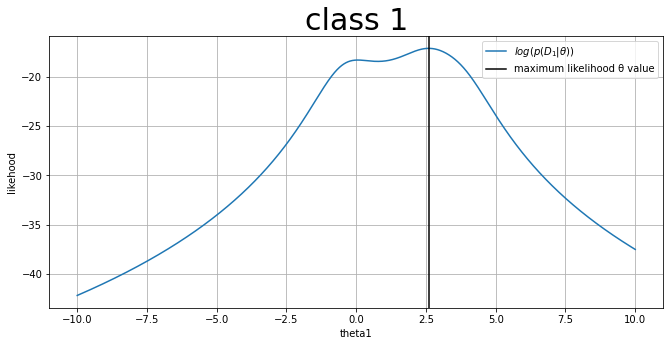

Theta 1 is 2.599999999993017


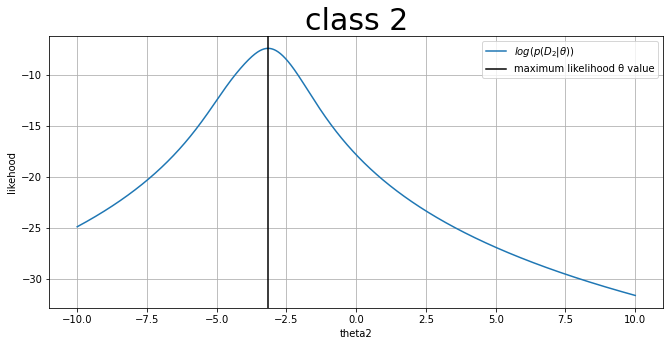

Theta 2 is -3.1590000000037914


In [ ]:
D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]
D2 = [-4.5, -3.4, -3.1, -3, -2.3]
thetas = np.arange(-10, 10, 0.001)
myClassifier = Classifier()
theta1 = myClassifier.fit(D1,thetas,1)
theta2 = myClassifier.fit(D2,thetas,2)


##2.Discriminant function

In this query we use the function: $g(x) = log(P|̂\hat{θ_1}) - log(P|̂\hat{θ_2}) + logP(ω_1) - logP(ω_2)$ as a discriminant function to classify data. By observing this function we can predict that if its sign is positive the occurence will belong to class 1, because $log(P|̂\hat{θ_1}) > log(P|̂\hat{θ_2})$. Similarly if it is negative to class 2. Quantities  $logP(ω_1)$ and $logP(ω_1)$ are realively small.

By ploting $g(x)$ and highligthing class 1 and 2 occurences, we observe that the above assumption is indeed true. So the desicion rule should be:

${if}= \left\{
\begin{array}{ll}
      g(x) > 0, & belongs \; in \; class \;1 \\
      g(x) < 0, & belongs \; in \; class \;2\\
\end{array} 
\right. 
$

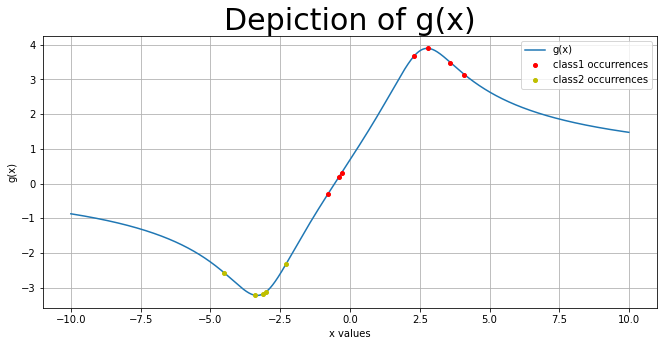

In [ ]:
Pomega1 = 7/12
Pomega2 = 5/12
D = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1,-4.5, -3.4, -3.1, -3, -2.3]
b = myClassifier.predict(theta1,theta2,D1,D2,Pomega1,Pomega2)


we can observe that there is some level of misclassification by using this mathod because one of our data was not classified correctly


# **PART B**

1. Let's calculate and show the aposteriori probabilities $p(\theta|D_1)$ and $p(\theta|D_2)$. By using the Bayes Rule we obtain $$P(\theta|D_i) = \frac{P(D_i|\theta)p(\theta)}{P(D_i)}$$

We can calculate $P(D_i)$ as $$P(D_i) = ∫P(D_i|\theta)p(\theta)d\theta$$


In [ ]:
likelihood1 = lambda theta : np.prod([(1/math.pi)*(1/(1 +(x-theta)**2)) for x in D1])
likelihood2 = lambda theta : np.prod([(1/math.pi)*(1/(1 +(x-theta)**2)) for x in D2])

likelihood_theta = lambda theta : (1 / (10 * np.pi)) * 1 / (1 + pow(theta / 10, 2))

estimates = np.array([likelihood_theta(theta) for theta in thetas])

estimates_d1 = np.array([np.prod(likelihood1(theta)) for theta in thetas])
estimates_d2 = np.array([np.prod(likelihood2(theta)) for theta in thetas])
#print(estimates)
#print(estimates_d1)
#print(estimates_d2)
aposteriori_1 = (np.multiply(estimates, estimates_d1)) / np.trapz(np.multiply(estimates, estimates_d1), x = thetas)
aposteriori_2 = (np.multiply(estimates, estimates_d2)) / np.trapz(np.multiply(estimates, estimates_d2), x = thetas)



Let's now plot $p(θ)$:


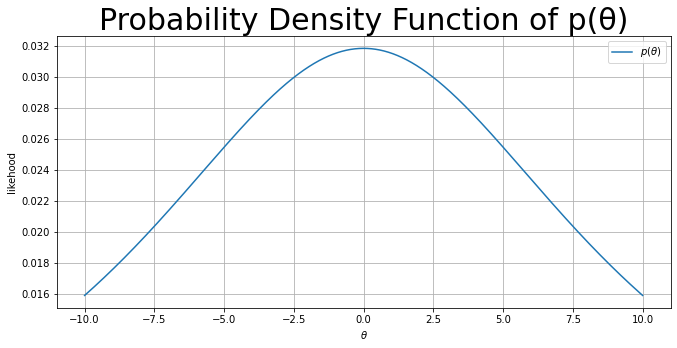

In [ ]:
plt.plot(thetas,estimates  ,label = f'$p(\u03B8)$')

# plt.axvline(x = theta, color = 'black', label = 'maximum likelihood \u03B8 value')
plt.grid()
plt.title(f'Probability Density Function of p(θ)', fontsize=30)
plt.xlabel(f'$θ$')
plt.ylabel('likehood')
plt.legend()
plt.show()

Let's now plot $p(θ|D_1$)

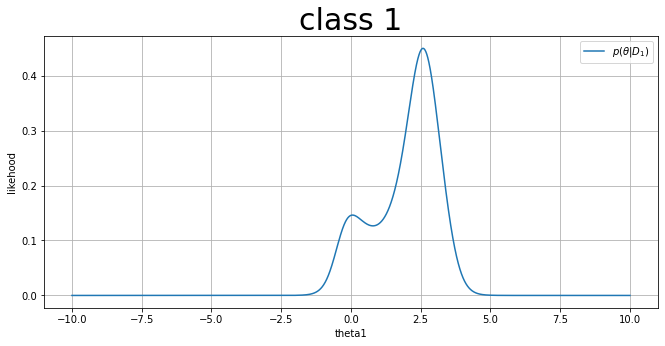

In [ ]:
plt.plot(thetas,aposteriori_1  ,label = f'$p(\u03B8|D_{1})$')
# plt.axvline(x = theta, color = 'black', label = 'maximum likelihood \u03B8 value')
plt.grid()
plt.title(f'class {1}', fontsize=30)
plt.xlabel(f'theta{1}')
plt.ylabel('likehood')
plt.legend()
plt.show()

and $p(θ|D_2)$ as well:

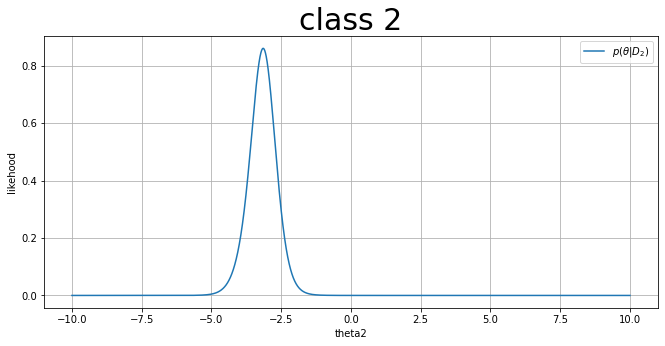

In [ ]:
plt.plot(thetas,aposteriori_2  ,label = f'$p(\u03B8|D_{2})$')
# plt.axvline(x = theta, color = 'black', label = 'maximum likelihood \u03B8 value')
plt.grid()
plt.title(f'class {2}', fontsize=30)
plt.xlabel(f'theta{2}')
plt.ylabel('likehood')
plt.legend()
plt.show()

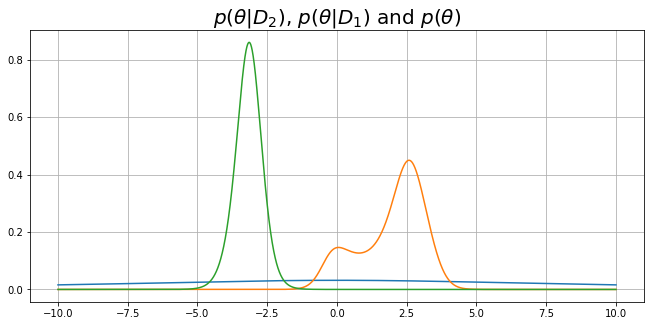

In [ ]:
plt.title('$p(θ|D_2)$, $p(θ|D_1)$ and $p(θ)$', fontsize=20)
plt.plot(thetas,estimates  ,label = f'$p(\u03B8)$')
plt.plot(thetas,aposteriori_1  ,label = f'$p(\u03B8|D_{1})$')
plt.plot(thetas,aposteriori_2  ,label = f'$p(\u03B8|D_{2})$')
plt.grid()
plt.show()

By plotting functions $p(θ|D_2)$, $p(θ|D_1)$ and $p(θ)$ in one plot, we observe that while not knowing the class in which the data belong to, theta can take any value with almost the same likelihood. No value of theta has significant higher likelihood than the others. If we know the class in which the data belong certain theta values become much more likely than others. So we can peak a theta values for each class with confidence. That's for the difference between $p(θ|D_i)$ and $p(θ)$. By oberving $p(θ|D_2)$ and  $p(θ|D_1)$ we conclude that likely theta values for the first class belong to a seperate interval than likely theta values for the second class. In this way we can be a bit more confident that the final classification of data will be more accurate.

# **PART 2B**

We need to create a function that predicts the values of the following disciminant function: $$h(x) = logP(x|D_1) - logP(x|D_2) + logP(ω_1) - logP(ω_2)$$

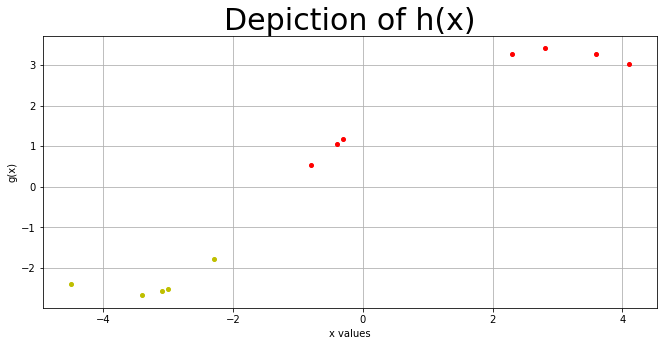

In [ ]:

Px_theta = lambda x, theta: (1 / np.pi) * 1 / (1 + pow(x - theta, 2))

distribution = np.array([Px_theta(x, thetas) for x in np.hstack((D1, D2))])
distribution.shape

P_xD1 = np.trapz(np.multiply(distribution, aposteriori_1), x = thetas)
P_xD2 = np.trapz(np.multiply(distribution, aposteriori_2), x = thetas)
class_1 = []
class_2 = []
for i in range(P_xD1.shape[0]):
  g_x = np.log(P_xD1[i]) - np.log(P_xD2[i]) + np.log(Pomega1) - np.log(Pomega2)
  if g_x > 0:
    class_1.append(g_x)
  else:
    class_2.append(g_x)

plt.plot(D1,class_1,'r',marker='o', ls='none', ms=4)
plt.plot(D2,class_2,'y',marker='o', ls='none', ms=4)
#plt.axvline(x = thetas1[estimates1.index(max(estimates1))], color = 'black', label = 'maximum likelihood \u03B8 value')
#plt.axvline(x = thetas2[estimates2.index(max(estimates2))], color = 'black', label = 'maximum likelihood \u03B8 value')
plt.grid()
plt.title('Depiction of h(x)', fontsize=30)
plt.xlabel('x values')
plt.ylabel('g(x)')
# plt.legend()
plt.show()

We can see that our discriminant function $h(x)$ succesfully classifies our data. We can observe that the decision bound is the line $y=0$ and is respected while that is not the case for the max likelihood discriminant function g(x) which had a missclasification. This method is less prone to overfitting. Let's see the differences between MLE and Bayes estimating.

Maximum Likelihood Estimation (MLE) and Bayesian approaches are two different methods for estimating the parameters of a statistical model.

### **Why MLE or Bayesian Classifier?**
Both MLE and Bayesian approaches can be used to estimate the parameters of a statistical model and make predictions based on the data. However, they differ in the way that they treat the uncertainty about the model parameters and the assumptions that they make about the data. MLE is a frequentist approach, which means it does not incorporate uncertainty about the model parameters into the estimation process. Bayesian methods, on the other hand, explicitly incorporate uncertainty about the model parameters through the use of prior distributions and the updated posterior distributions.

### **Maximum Likelihood Estimate**

MLE is a method for estimating the parameters of a statistical model by maximizing the likelihood function, which is the probability of observing the data given the model and its parameters. MLE estimates the parameters of a model by finding the values that maximize the likelihood function. This approach is based on the principle of maximum likelihood, which states that the parameters that are most likely to have generated the data are the ones that are most likely to be true.

With MLE, we seek a point value for θ which maximizes the likelihood, $p(D|θ)$. We can denote this value as $\hat{θ}$. In MLE, $\hat{θ}$ is a point estimate, not a random variable.

In other words, in the equation above, MLE treats the term $\frac{p(θ)}{p(D)}$ as a constant and does NOT allow us to inject our prior beliefs, $p(θ)$, about the likely values for θ in the estimation calculations.

### **Bayesian Estimate**

On the other hand, Bayesian methods involve using Bayes' theorem to update the probability of a hypothesis as more data becomes available. In Bayesian analysis, the data are used to update the prior probability distribution of the model parameters, resulting in a posterior probability distribution. This posterior distribution can then be used to make predictions about the values of the model parameters or to make decisions based on the data.

Bayesian estimation fully calculates (or at times approximates) the posterior distribution $p(θ|D)$. Bayesian inference treats $θ$ as a random variable. In Bayesian estimation, we put in probability density functions and get out probability density functions, rather than a single point as in MLE.

Of all the $θ$ values made possible by the output distribution $p(θ|D)$, it is our job to select a value that we consider best in some sense. For example, we may choose the expected value of $θ$ assuming its variance is small enough. The variance that we can calculate for the parameter $θ$ from its posterior distribution allows us to express our confidence in any specific value we may use as an estimate. If the variance is too large, we may declare that there does not exist a good estimate for $θ$.
